In [1]:
import numpy as np
import pandas as pd
import polars as pl
import datetime as dt
import matplotlib.pyplot as plt
# import matplotlib as mpl
# mpl.style.use("ggplot")
import seaborn as sns
sns.set()
import japanize_matplotlib

In [86]:
date = dt.date(2022,1,2)

msm_df = pl.read_csv(f"../msm_jst_data/{date.year}/{str(date.month).zfill(2)}/{date.year}_{str(date.month).zfill(2)}{str(date.day).zfill(2)}.csv")
obs_df = pl.read_csv(f"../obs_data/{date.year}/{str(date.month).zfill(2)}/{date.year}_{str(date.month).zfill(2)}{str(date.day).zfill(2)}.csv").drop("時間")

In [87]:
# カラム名の統一

msm_df = msm_df.with_columns(pl.col("日付(JST)").alias("日付")).drop("日付(JST)")
obs_df = obs_df.with_columns(pl.col("現地気圧").alias("地上気圧")).drop("現地気圧")

In [88]:
## MSMの気圧をobsと同じ尺度にする(信憑性はない)
## Source:https://keisan.casio.jp/exec/system/1236239160


#98.0638
bias = 100

msm_df = msm_df.with_columns(pl.col("地上気圧").apply(lambda x: x/bias).alias("地上気圧"))

In [89]:
msm_df.head()

海面気圧,地上気圧,東風,西風,気温,相対湿度,降水量,雲量,下行短波放射線フラックス,日付
f64,f64,f64,f64,f64,f64,f64,f64,f64,str
102410.550323,991.293574,-1.11315,-0.409786,-0.769649,75.084862,200.0,7.861669,665.0,"""2022-01-02 00:..."
102397.24757,991.036694,-0.336391,0.238532,-1.587672,82.052752,-0.000007,25.830001,0.0005,"""2022-01-02 01:..."
102361.009039,990.825685,-1.180428,0.954128,-0.12673,75.646789,-0.000007,39.99,0.0005,"""2022-01-02 02:..."
102336.238397,990.62385,-1.24159,0.183486,0.181662,78.919725,200.0,31.493334,665.0,"""2022-01-02 03:..."
102300.458581,990.174308,-1.051988,-0.562691,-0.150252,82.731651,-0.000007,30.030001,0.0005,"""2022-01-02 04:..."


In [90]:
obs_df.head()

海面気圧,降水量,気温,露点温度,蒸気圧,湿度,風速,風向,日照時間,全天日射量,降雪,積雪,天気,雲量,視程,日付,地上気圧
f64,i64,f64,f64,f64,i64,f64,str,f64,f64,i64,i64,i64,f64,f64,str,f64
1024.3,0,3.0,-11.7,2.5,33,1.6,"""北""",0.0,0.0,0,0,0,0.0,0.0,"""2022-01-02 00:...",1021.2
1024.4,0,2.6,-10.6,2.7,37,3.2,"""西北西""",0.0,0.0,0,0,0,0.0,0.0,"""2022-01-02 01:...",1021.3
1024.6,0,1.8,-10.0,2.9,41,1.9,"""北西""",0.0,0.0,0,0,0,0.0,0.0,"""2022-01-02 02:...",1021.5
1024.2,0,2.2,-9.7,2.9,41,2.6,"""北西""",0.0,0.0,0,0,0,0.0,30.0,"""2022-01-02 03:...",1021.1
1023.7,0,1.3,-9.6,3.0,44,1.8,"""北北西""",0.0,0.0,0,0,0,0.0,0.0,"""2022-01-02 04:...",1020.6


In [91]:
obs_df["日付"][0]

'2022-01-02 00:00:00'

In [92]:
## 日付をdatetime型にする
obs_df = obs_df.with_columns(pl.col("日付").apply(lambda x: dt.datetime.strptime(x,"%Y-%m-%d %H:%M:%S")).alias("日付"))
msm_df = msm_df.with_columns(pl.col("日付").apply(lambda x: dt.datetime.strptime(x,"%Y-%m-%d %H:%M:%S")).alias("日付"))

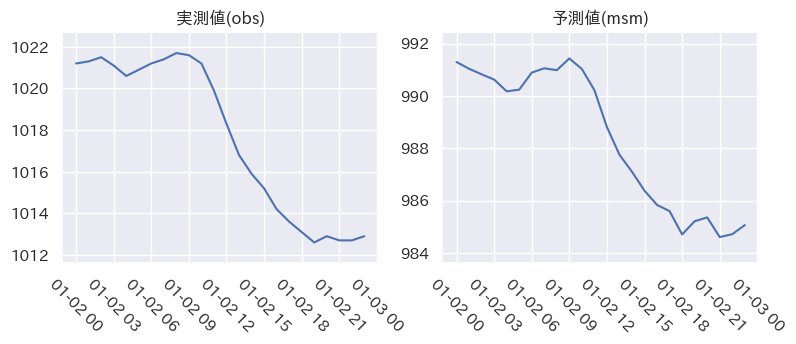

In [93]:
## MSMデータが生の時

fig,ax = plt.subplots(1,2,figsize=(9,3))
ax[0].plot(obs_df["日付"],obs_df["地上気圧"])
ax[1].plot(msm_df["日付"],msm_df["地上気圧"])

ax[0].set_title("実測値(obs)")
ax[1].set_title("予測値(msm)")

for i in range(2):
    ax[i].tick_params(axis="x",rotation=-45)

ax[0].set_ylim((obs_df["地上気圧"].min()-1,obs_df["地上気圧"].max()+1))
ax[1].set_ylim((msm_df["地上気圧"].min()-1,msm_df["地上気圧"].max()+1))

plt.show()

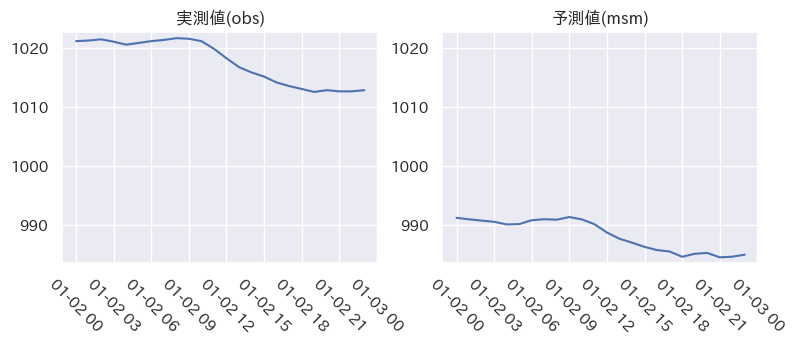

In [94]:
## MSMデータの尺度を変えたとき

fig,ax = plt.subplots(1,2,figsize=(9,3))
ax[0].plot(obs_df["日付"],obs_df["地上気圧"])
ax[1].plot(msm_df["日付"],msm_df["地上気圧"])

ax[0].set_title("実測値(obs)")
ax[1].set_title("予測値(msm)")

for i in range(2):
    ax[i].tick_params(axis="x",rotation=-45)


min_lim = obs_df["地上気圧"].min()
if min_lim > msm_df["地上気圧"].min(): min_lim = msm_df["地上気圧"].min()

max_lim = obs_df["地上気圧"].max()
if max_lim < msm_df["地上気圧"].max(): max_lim = msm_df["地上気圧"].max()

ax[0].set_ylim((min_lim-1,max_lim+1))
ax[1].set_ylim((min_lim-1,max_lim+1))

plt.show()

In [96]:
day = 3

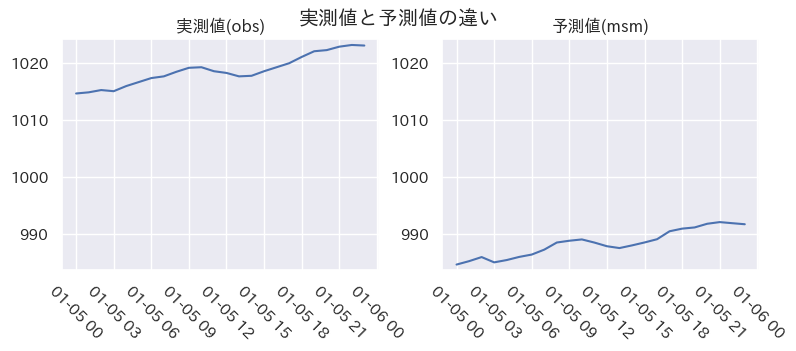

In [100]:
## 一気に実行する用
date = dt.date(2022,1,day)

msm_df = pl.read_csv(f"../msm_jst_data/{date.year}/{str(date.month).zfill(2)}/{date.year}_{str(date.month).zfill(2)}{str(date.day).zfill(2)}.csv")
obs_df = pl.read_csv(f"../obs_data/{date.year}/{str(date.month).zfill(2)}/{date.year}_{str(date.month).zfill(2)}{str(date.day).zfill(2)}.csv").drop("時間")

msm_df = msm_df.with_columns(pl.col("日付(JST)").alias("日付")).drop("日付(JST)")
obs_df = obs_df.with_columns(pl.col("現地気圧").alias("地上気圧")).drop("現地気圧")

## MSMの気圧をobsと同じ尺度にする(信憑性はない)
## Source:https://keisan.casio.jp/exec/system/1236239160


#98.0638
bias = 100

msm_df = msm_df.with_columns(pl.col("地上気圧").apply(lambda x: x/bias).alias("地上気圧"))

## 日付をdatetime型にする
obs_df = obs_df.with_columns(pl.col("日付").apply(lambda x: dt.datetime.strptime(x,"%Y-%m-%d %H:%M:%S")).alias("日付"))
msm_df = msm_df.with_columns(pl.col("日付").apply(lambda x: dt.datetime.strptime(x,"%Y-%m-%d %H:%M:%S")).alias("日付"))

## MSMデータの尺度を変えたとき

fig,ax = plt.subplots(1,2,figsize=(9,3))
ax[0].plot(obs_df["日付"],obs_df["地上気圧"])
ax[1].plot(msm_df["日付"],msm_df["地上気圧"])

ax[0].set_title("実測値(obs)")
ax[1].set_title("予測値(msm)")

for i in range(2):
    ax[i].tick_params(axis="x",rotation=-45)


min_lim = obs_df["地上気圧"].min()
if min_lim > msm_df["地上気圧"].min(): min_lim = msm_df["地上気圧"].min()

max_lim = obs_df["地上気圧"].max()
if max_lim < msm_df["地上気圧"].max(): max_lim = msm_df["地上気圧"].max()

ax[0].set_ylim((min_lim-1,max_lim+1))
ax[1].set_ylim((min_lim-1,max_lim+1))

plt.suptitle("実測値と予測値の違い")

plt.show()
day += 1